# Opioid Addiction Project
## Notebook 03: Feature Selection

This notebook does a few things:

1. Removes most of the features (columns), keeping only those which are used in the model
2. Performs preprocessing on the features as needed, including:
  * Re-coding features
  * Bin values as needed
  * One-hot encodes categorical features
  * Scaling and centering continuous features  

### W210, Capstone
Summer 2019

Team:  Cameron Kennedy, Aditi Khullar, Rachel Kramer, Sharad Varadarajan

# 0. Load Libraries and Set Global Variables
This analysis is performed in the cells below.

In [1]:
#Import Required Libraries
import numpy as np
import pandas as pd
import re

#Custom data prep function used in both training and prediction 
import OpioidDataPrep as odp

#Set initial parameter(s)
pd.set_option('display.max_rows', 200)
pd.options.display.max_columns = 150
dataDir = './data/'

print('Pandas Version', pd.__version__)

Pandas Version 0.24.1


# 1. Load Data

This step loads the data from the file `misuse.pickle.zip`.

In [2]:
#Load Data
df = pd.read_pickle(dataDir+'misuse.pickle.zip')
df

AALTMDE  ABODALC  ABODCOC  ABODHER  ABODMRJ  ABPYILANAL  ABPYILLALC  \
19          NaN        0        0        0        0           0           0   
20          0.0        1        0        0        0           0           1   
21          NaN        0        0        0        0           0           0   
23          NaN        0        0        0        0           0           0   
33          NaN        0        0        0        0           0           0   
34          NaN        0        0        0        0           0           0   
36          NaN        0        0        0        0           0           0   
46          NaN        0        0        0        0           0           0   
50          NaN        0        0        0        0           0           0   
52          NaN        0        0        0        0           0           0   
54          0.0        1        0        0        0           0           1   
58          NaN        1        0        0        0           0           0   
66          NaN        1        0        0        0           0           1   
76          NaN        0        0        0        0           0           0   
78          NaN        0        0        0        0           0           0   
81          NaN        0        0        0        0           0           0   
85          0.0        0        0        0        0           0           0   
90          NaN        0        0        0        0           0           0   
96          NaN        1        0        0        1           0           0   
97          NaN        0        0        0        0           0           0   
103         NaN        0        0        1        0           0           0   
104         NaN        0        0        0        0           0           0   
108         NaN        0        0        0        0           0           0   
114         0.0        0        0        0        0           0           0   
115         NaN        0        0        0        0           0           0   
117         NaN        0        0        0        0           0           0   
123         0.0        0        0        0        0           0           0   
124         NaN        0        0        0        0           0           0   
126         NaN        0        0        0        0           0           0   
130         0.0        0        0        0        0           0           0   
131         NaN        0        0        0        0           0           0   
134         NaN        0        0        0        0           0           0   
135         NaN        0        0        0        0           0           0   
138         NaN        0        0        0        0           0           0   
140         NaN        0        0        0        0           0           0   
142         NaN        0        0        0        0           0           0   
146         NaN        0        0        0        0           0           0   
150         NaN        0        0        0        0           0           0   
151         0.0        0        0        0        0           0           0   
153         NaN        0        0        0        0           0           0   
165         0.0        0        0        0        0           0           0   
169         1.0        0        0        1        0           0           0   
171         NaN        0        0        0        0           0           0   
173         NaN        0        0        0        0           0           0   
180         NaN        0        0        0        0           0           0   
182         NaN        0        0        0        0           0           0   
183         NaN        0        0        0        0           0           0   
188         NaN        0        0        0        0           0           0   
193         NaN        0        0        0        0           0           0   
200         NaN        0        0        0        0       

# 2. Feature Selection

Here we'll keep only the features we want in our final model.

In addition to our feature selection, we'll also tag each variable with the types of preprocessing required for each one individually. Tagging them here helps ensure they don't make it to the model without having first been preprocessed.

In [3]:
# #Column finder
odp.colFinder(df, 'DRV')

['BKDRVINF']


In [4]:
#List of variables to keep, along with a quick description and proessing strategy
colsToKeep = [#DEMOGRAPHICS
              'IRSEX', #(Gender):  Subtract 1 from this field to make it 0=Male, 1=Female
              #'IREDUHIGHST2', #(Highest Education) - Removed in favor of EDUHIGHCAT
              'EDUHIGHCAT', #(Highest Education)
              'AGE2', #(Age): Scale and center
    
              #ALCOHOL
              'IRALCRC', #(Alcohol Recency): Straight One Hot
              'IRALCFY', #(Alcohol Frequency Past Year):  Bin
              'BNGDRKMON', #(Binge drinking, past 30 days):  No action required (already binary, 0 and 1)
              'HVYDRKMON', #(Heavy drinking, past 30 days):  No action required (already binary, 0 and 1)
              'IRALCAGE', #(First time used alcohol): Bin

              #DRUGS + ALCOHOL
              'TXYRRECVD2', #(Ever alcohol/drug treatment, past yr): No action required (already binary, 0 and 1)
              'TXEVRRCVD2', #(Ever alcohol/drug treatment, lifetime): No action required (already binary, 0 and 1)

              #'DRVINALCO2', #Not found in data
              #TOBACCO
              'IRCIGRC', #(Tobacco Recency, incl. Never):  Straight One Hot
              'CIGDLYMO', #(Tobacco 30+ consecutive days):  Straight One Hot
              'CIGAGE', #(Tobacco Use Daily):  Bin
              'PIPEVER', #(Ever smoked a pipe): Straight One Hot
              'IRCGRRC', #(Cigar recency): Straight One Hot
              'IRSMKLSSREC', #(Smokeless tobacco recency): Straight One Hot
    
              #WEED
              'IRMJRC', #(Weed recency): Straight One Hot
              'MJYRTOT', #(Weed days in past year):  Bin
              'FUMJ18', #(First used weed prior to age 18): Subtract 1
              'FUMJ21', #(First used weed prior to age 21): Subtract 1
              #'DRVINMARJ', #Not found in data
    
              #DEPRESSION
              'ADDPREV', #(Several days of depression): One Hot
              'ADDSCEV', #(Several days of discouraged about life): One Hot
    
              ##OTHER
              'BOOKED', #(Ever arrested & booked): Recode + One Hot
                      
              #OUTCOME VARIABLE    
              'MISUSE',
             ]

df = df[colsToKeep] #Use colsToKeep.keys() if using dictionary method
df

IRSEX  EDUHIGHCAT  AGE2  IRALCRC  IRALCFY  BNGDRKMON  HVYDRKMON  \
19          2           5     4        9      991          0          0   
20          1           1    11        2       60          0          0   
21          2           3    12        2       20          0          0   
23          2           3     8        3      993          0          0   
33          2           2    11        1      192          1          0   
34          2           3     9        1       52          1          1   
36          1           1    17        3      993          0          0   
46          1           2     8        2       12          0          0   
50          2           3    15        1       36          1          0   
52          2           5     4        9      991          0          0   
54          1           2    16        1      156          1          0   
58          2           4    11        1      240          1          1   
66          2           4    13        1      144          1          0   
76          1           1    15        2      144          0          0   
78          2           3    15        3      993          0          0   
81          1           5     2        9      991          0          0   
85          1           4    15        2        1          0          0   
90          2           2     7        9      991          0          0   
96          1           2     9        2       60          0          0   
97          2           2    15        3      993          0          0   
103         1           3    11        1       36          1          0   
104         2           3    15        9      991          0          0   
108         2           2    15        1       60          1          0   
114         2           4    15        1        5          0          0   
115         2           5     4        1       52          0          0   
117         2           1    16        9      991          0          0   
123         2           3    15        1       36          0          0   
124         2           4    14        9      991          0          0   
126         2           3    14        2       52          0          0   
130         2           3    12        2        5          0          0   
131         1           1    16        9      991          0          0   
134         1           2    15        3      993          0          0   
135         1           1     7        9      991          0          0   
138         1           2    15        2        1          0          0   
140         2           4    16        1      144          0          0   
142         2           3    15        3      993          0          0   
146         2           1     7        9      991          0          0   
150         2           3    14        1      168          0          0   
151         2           2    16        2        9          0          0   
153         1           4    15        1       48          1          1   
165         1           4    16        1      335          1          1   
169         2           3    16        3      993          0          0   
171         1           2     7        2       10          0          0   
173         1           1     7        9      991          0          0   
180         2           4    14        1       60          0          0   
182         2           5     2        9      991          0          0   
183         1           4    15        2        5          0          0   
188         2           3    17        3      993          0          0   
193         1           4    12        1       52          1          0   
200         2           3    16        1       11          0          0   
204         1           4    13        1      156          1          0   
213         2           5     4        1        5          1          0   
217         1           3    17  

In [5]:
# #COMMENT OUT, BUT DON'T DELETE - USED TO GENERATE MANUAL MEANs and STDs

# #First need to recode (manually)
# IREDUHIGHST2 = {1:5.0, 2:6.0, 3:7.0, 4:8.0, 5:9.0, 6:10.0, 7:11.0, 8:12.0, 9:14.0, 10:15.0, 11:16.0}
# AGE2 = {1:12.0, 2:13.0, 3:14.0, 4:15.0, 5:16.0, 6:17.0, 7:18.0, 8:19.0, 9:20.0, 10:21.0,
#         11:np.mean([22,23]), 12:np.mean([24,25]), 13:np.mean([26,29]), 14:np.mean([30,34]),
#         15:np.mean([35,49]), 16:np.mean([50,64]), 17:70.0
#        }

# odp.prepRecode(df, 'AGE2', AGE2)
# odp.prepRecode(df, 'IREDUHIGHST2', IREDUHIGHST2)

# meanAGE2 = np.mean(df['AGE2'])
# meanIREDUHIGHST2 = np.mean(df['IREDUHIGHST2'])
# stdAGE2 = np.std(df['AGE2'])
# stdIREDUHIGHST2 = np.std(df['IREDUHIGHST2'])

# print(meanAGE2) #34.442670265002434
# print(meanIREDUHIGHST2) #12.759511226057949
# print(stdAGE2) #16.35478216502389
# print(stdIREDUHIGHST2) #2.6718811981473394


In [6]:
df

IRSEX  EDUHIGHCAT  AGE2  IRALCRC  IRALCFY  BNGDRKMON  HVYDRKMON  \
19          2           5     4        9      991          0          0   
20          1           1    11        2       60          0          0   
21          2           3    12        2       20          0          0   
23          2           3     8        3      993          0          0   
33          2           2    11        1      192          1          0   
34          2           3     9        1       52          1          1   
36          1           1    17        3      993          0          0   
46          1           2     8        2       12          0          0   
50          2           3    15        1       36          1          0   
52          2           5     4        9      991          0          0   
54          1           2    16        1      156          1          0   
58          2           4    11        1      240          1          1   
66          2           4    13        1      144          1          0   
76          1           1    15        2      144          0          0   
78          2           3    15        3      993          0          0   
81          1           5     2        9      991          0          0   
85          1           4    15        2        1          0          0   
90          2           2     7        9      991          0          0   
96          1           2     9        2       60          0          0   
97          2           2    15        3      993          0          0   
103         1           3    11        1       36          1          0   
104         2           3    15        9      991          0          0   
108         2           2    15        1       60          1          0   
114         2           4    15        1        5          0          0   
115         2           5     4        1       52          0          0   
117         2           1    16        9      991          0          0   
123         2           3    15        1       36          0          0   
124         2           4    14        9      991          0          0   
126         2           3    14        2       52          0          0   
130         2           3    12        2        5          0          0   
131         1           1    16        9      991          0          0   
134         1           2    15        3      993          0          0   
135         1           1     7        9      991          0          0   
138         1           2    15        2        1          0          0   
140         2           4    16        1      144          0          0   
142         2           3    15        3      993          0          0   
146         2           1     7        9      991          0          0   
150         2           3    14        1      168          0          0   
151         2           2    16        2        9          0          0   
153         1           4    15        1       48          1          1   
165         1           4    16        1      335          1          1   
169         2           3    16        3      993          0          0   
171         1           2     7        2       10          0          0   
173         1           1     7        9      991          0          0   
180         2           4    14        1       60          0          0   
182         2           5     2        9      991          0          0   
183         1           4    15        2        5          0          0   
188         2           3    17        3      993          0          0   
193         1           4    12        1       52          1          0   
200         2           3    16        1       11          0          0   
204         1           4    13        1      156          1          0   
213         2           5     4        1        5          1          0   
217         1           3    17  

In [7]:
#Just a quick function to get counts. Not needed for final solution.
df['BOOKED'].value_counts()

2     41879
1     10870
3       403
97      133
94       54
98       17
85        2
Name: BOOKED, dtype: int64

# 3. Feature Preprocessing

In [8]:
df = odp.preprocess(df)
df

C:\Users\camke\OneDrive\Education\Berkeley\W210_Capstone\Project\OpiGit\OpioidDataPrep.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  dfIn[colIn] = 2-dfIn[colIn]
C:\Users\camke\OneDrive\Education\Berkeley\W210_Capstone\Project\OpiGit\OpioidDataPrep.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  dfIn[colIn+'_'] = pd.cut(dfIn[colIn], bins=cutPoints, include_lowest=True, labels=labels)
C:\Users\camke\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

IRSEX      AGE2  BNGDRKMON  HVYDRKMON  TXYRRECVD2  TXEVRRCVD2  FUMJ18  \
19          0 -1.188806          0          0           0           0       0   
20          1 -0.730225          0          0           0           0       1   
21          0 -0.607937          0          0           0           0       0   
23          0 -0.944230          0          0           0           0       0   
33          0 -0.730225          1          0           0           0       0   
34          0 -0.883085          1          1           0           0       1   
36          1  2.174124          0          0           0           0       0   
46          1 -0.944230          0          0           0           0       1   
50          0  0.462087          1          0           0           0       0   
52          0 -1.188806          0          0           0           0       0   
54          1  1.379250          1          0           0           0       1   
58          0 -0.730225          1          1           0           0       0   
66          0 -0.424504          1          0           0           1       1   
76          1  0.462087          0          0           0           0       0   
78          0  0.462087          0          0           0           0       1   
81          1 -1.311095          0          0           0           0       0   
85          1  0.462087          0          0           1           1       0   
90          0 -1.005374          0          0           0           0       0   
96          1 -0.883085          0          0           0           1       1   
97          0  0.462087          0          0           0           0       1   
103         1 -0.730225          1          0           1           1       1   
104         0  0.462087          0          0           0           0       0   
108         0  0.462087          1          0           0           0       0   
114         0  0.462087          0          0           0           0       0   
115         0 -1.188806          0          0           0           0       0   
117         0  1.379250          0          0           0           0       0   
123         0  0.462087          0          0           0           0       1   
124         0 -0.149355          0          0           0           0       0   
126         0 -0.149355          0          0           0           0       0   
130         0 -0.607937          0          0           0           0       0   
131         1  1.379250          0          0           0           0       0   
134         1  0.462087          0          0           1           1       1   
135         1 -1.005374          0          0           0           0       0   
138         1  0.462087          0          0           1           1       1   
140         0  1.379250          0          0           0           0       0   
142         0  0.462087          0          0           0           0       0   
146         0 -1.005374          0          0           0           0       1   
150         0 -0.149355          0          0           0           1       1   
151         0  1.379250          0          0           0           0       1   
153         1  0.462087          1          1           0           0       0   
165         1  1.379250          1          1           0           0       1   
169         0  1.379250          0          0           1           1       1   
171         1 -1.005374          0          0           0           0       1   
173         1 -1.005374          0          0           0           0       0   
180         0 -0.149355          0          0           0           0       1   
182         0 -1.311095          0          0           0           0       0   
183         1  0.462087          0          0           0           0       0   
188         0  2.174124          0          0           0           0       0   
193         1 -0.607937          1     

In [9]:
### DO NOT SET fakeGreatPredictor = True FOR ACTUAL MODEL DEVELOPMENT ###
'''This cell createS a close-to-perfect predictor of our outcome variable MISUSE.
It copies MISUSE into a new column, M2, and then randomly changes a few rows.
Making this great predictor allows testing of the subsequent model to ensure
it is training properly.
'''
fakeGreatPredictor = False

if fakeGreatPredictor:
    df['M2'] = df['MISUSE'] #Create PERFECT predictor called M2

    dfLen = len(df)
    
    dfupdate=df.sample(int(dfLen*0.1)) #Randomly change 10% of rows to 0
    dfupdate.M2=0
    df.update(dfupdate)
    
    dfupdate=df.sample(int(dfLen*0.1)) #Randomly change 10% of rows to 1
    dfupdate.M2=1
    df.update(dfupdate)    

df

IRSEX      AGE2  BNGDRKMON  HVYDRKMON  TXYRRECVD2  TXEVRRCVD2  FUMJ18  \
19          0 -1.188806          0          0           0           0       0   
20          1 -0.730225          0          0           0           0       1   
21          0 -0.607937          0          0           0           0       0   
23          0 -0.944230          0          0           0           0       0   
33          0 -0.730225          1          0           0           0       0   
34          0 -0.883085          1          1           0           0       1   
36          1  2.174124          0          0           0           0       0   
46          1 -0.944230          0          0           0           0       1   
50          0  0.462087          1          0           0           0       0   
52          0 -1.188806          0          0           0           0       0   
54          1  1.379250          1          0           0           0       1   
58          0 -0.730225          1          1           0           0       0   
66          0 -0.424504          1          0           0           1       1   
76          1  0.462087          0          0           0           0       0   
78          0  0.462087          0          0           0           0       1   
81          1 -1.311095          0          0           0           0       0   
85          1  0.462087          0          0           1           1       0   
90          0 -1.005374          0          0           0           0       0   
96          1 -0.883085          0          0           0           1       1   
97          0  0.462087          0          0           0           0       1   
103         1 -0.730225          1          0           1           1       1   
104         0  0.462087          0          0           0           0       0   
108         0  0.462087          1          0           0           0       0   
114         0  0.462087          0          0           0           0       0   
115         0 -1.188806          0          0           0           0       0   
117         0  1.379250          0          0           0           0       0   
123         0  0.462087          0          0           0           0       1   
124         0 -0.149355          0          0           0           0       0   
126         0 -0.149355          0          0           0           0       0   
130         0 -0.607937          0          0           0           0       0   
131         1  1.379250          0          0           0           0       0   
134         1  0.462087          0          0           1           1       1   
135         1 -1.005374          0          0           0           0       0   
138         1  0.462087          0          0           1           1       1   
140         0  1.379250          0          0           0           0       0   
142         0  0.462087          0          0           0           0       0   
146         0 -1.005374          0          0           0           0       1   
150         0 -0.149355          0          0           0           1       1   
151         0  1.379250          0          0           0           0       1   
153         1  0.462087          1          1           0           0       0   
165         1  1.379250          1          1           0           0       1   
169         0  1.379250          0          0           1           1       1   
171         1 -1.005374          0          0           0           0       1   
173         1 -1.005374          0          0           0           0       0   
180         0 -0.149355          0          0           0           0       1   
182         0 -1.311095          0          0           0           0       0   
183         1  0.462087          0          0           0           0       0   
188         0  2.174124          0          0           0           0       0   
193         1 -0.607937          1     

# 4. Save to Pickle

In [10]:
#Save to pickle, for loading in the modeling (training) file
df.to_pickle(dataDir+'features.pickle.zip')
'''Note, the .to_pickle command INFERS zip compression based on the '.zip'
extension. Changing the extension will result in a 1GB file instead of a 
compressed file.
''';

#Also save as csv
df.to_csv(dataDir+'features.csv')

# 5. EDA Research

In [11]:
import matplotlib.pyplot as plt

C:\Users\camke\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:203: UserWarning: When passing multiple axes, layout keyword is ignored
  "ignored", UserWarning)


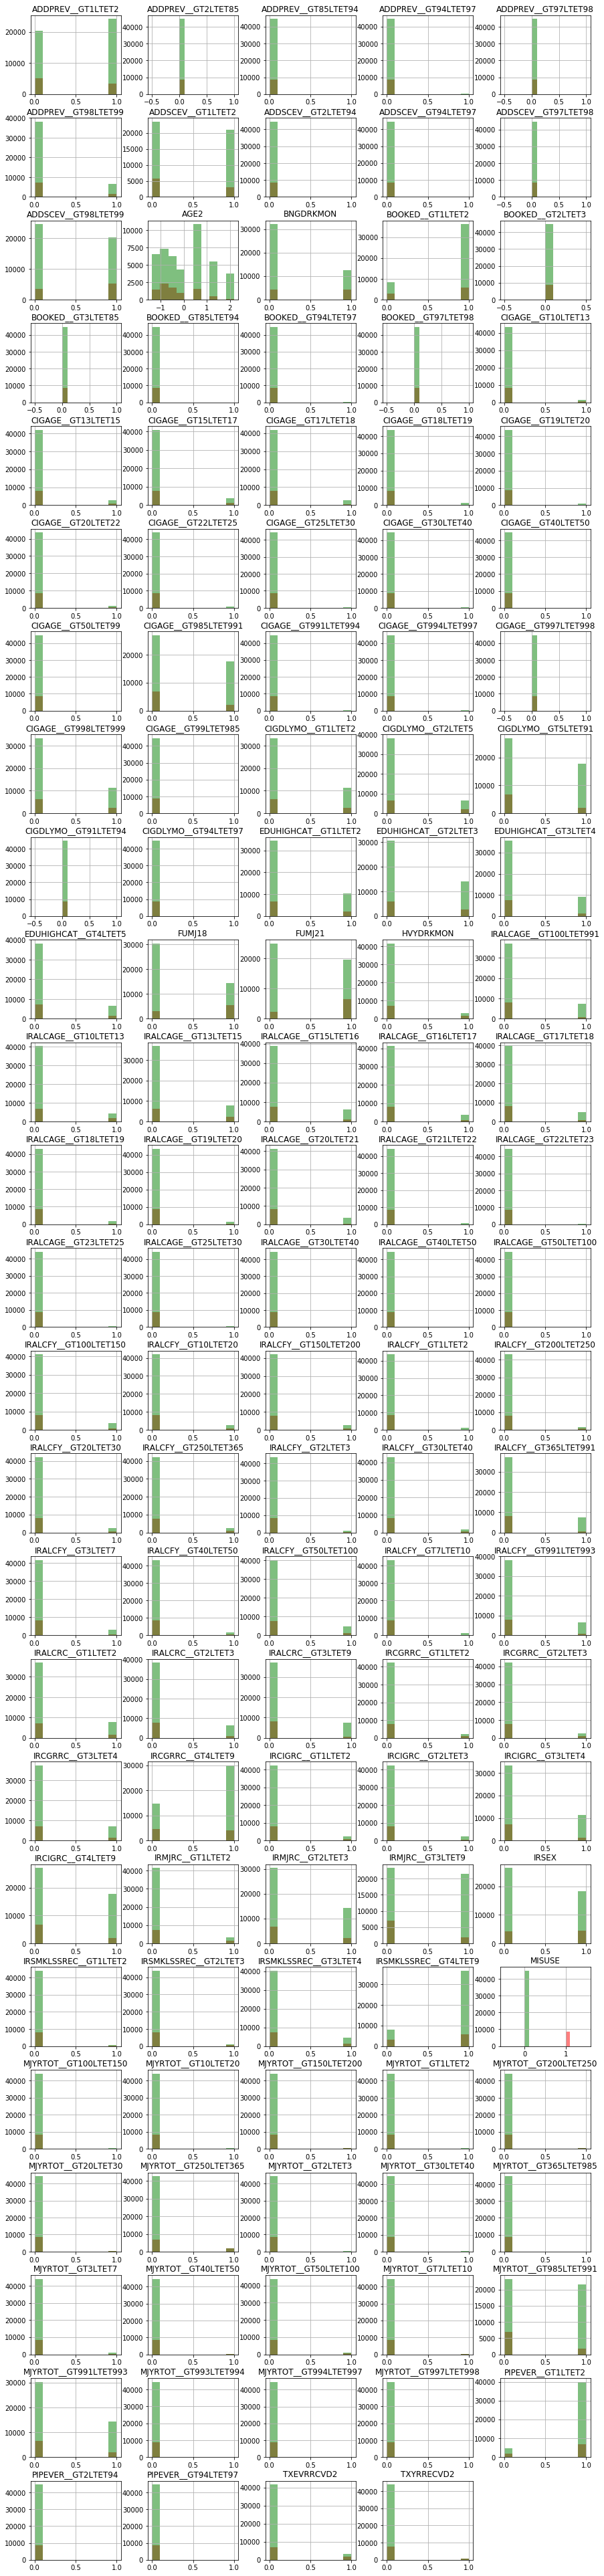

In [12]:
axes = df[df['MISUSE']==1].hist(layout=(25,5), alpha=0.5, 
                                figsize = (15,70), color='r')
df[df['MISUSE']==0].hist(ax=axes.ravel()[:len(df.columns)], 
                         layout=(25,5), alpha=0.5, color='g', figsize = (15,70))
plt.show()